In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
# Read and process data
log_file = open("/home/user/Desktop/june_r2_analysis/relaxed_lc/log.txt","r")
lines = log_file.readlines()
stats = []
lines = lines[1:]
for line in lines:
    stat = [float(i) for i in line.split()]
    stats.append(stat)

In [4]:
# Read and process data 2 
error_file = open("/home/user/Desktop/june_r2_analysis/relaxed_lc/error.txt","r")
lines = error_file.readlines()
errors = []
lines = lines[1:]
for line in lines: 
    error = [float(i) for i in line.split()]
    errors.append(error)

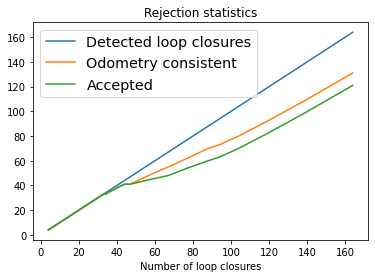

In [5]:
# Plot number of inliers of the number of loop clousres 
num_loop_closures = [stat[0] for stat in stats]
num_odom_consistent = [stat[2] for stat in stats]
num_inliers = [stat[1] for stat in stats]

fig, ax = plt.subplots()
ax.plot(num_loop_closures, num_loop_closures, label='Detected loop closures')
ax.plot(num_loop_closures, num_odom_consistent, label='Odometry consistent')
ax.plot(num_loop_closures, num_inliers, label='Accepted')
legend = ax.legend(loc='upper left', fontsize='x-large')
plt.xlabel('Number of loop closures')
plt.title('Rejection statistics')
plt.show()

Text(0.5, 1.0, 'Pose graph error')

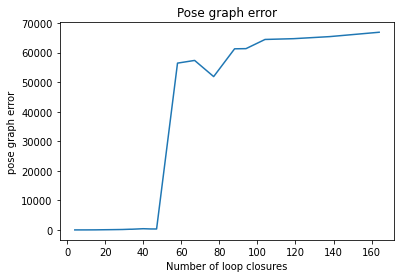

In [6]:
# Plot error over number of loop closures 
num_loop_closures = [stat[0] for stat in stats]
error = [stat[-1] for stat in stats]

plt.plot(num_loop_closures, error)
plt.xlabel('Number of loop closures')
plt.ylabel('pose graph error')
plt.title('Pose graph error')

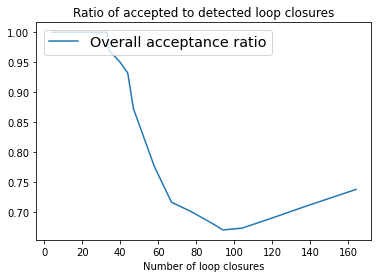

In [7]:
# Plot ratio of accepted loop closures 
num_loop_closures = [stat[0] for stat in stats]
overall_ratio = [stat[1]/stat[0] for stat in stats]
multirobot_ratio = [stat[4]/stat[3] for stat in stats if stat[3] != 0]
singlerobot_ratio = [(stat[1] - stat[4])/(stat[0] - stat[3])]

fig, ax = plt.subplots()
ax.plot(num_loop_closures, overall_ratio, label='Overall acceptance ratio')
if (len(multirobot_ratio) > 0):
    ax.plot(num_loop_closures, multirobot_ratio, label='Multirobot acceptance ratio')
    ax.plot(num_loop_closures, singlerobot_ratio, label='Single robot acceptance ratio')
legend = ax.legend(loc='upper left', fontsize='x-large')
plt.xlabel('Number of loop closures')
plt.title('Ratio of accepted to detected loop closures')
plt.show()

Text(0.5, 1.0, 'Consistency error by number of loop closures')

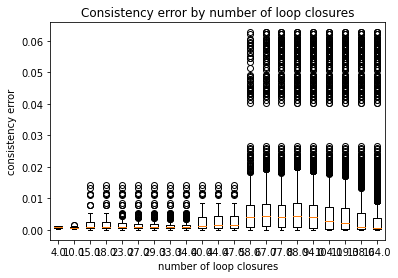

In [8]:
# Plot consistecy error of loop closures 
num_loop_closures = [stat[0] for stat in stats]

fig, ax = plt.subplots()
ax.boxplot(errors)
ax.set_xticklabels(num_loop_closures)
plt.xlabel('number of loop closures')
plt.ylabel('consistency error')
plt.title('Consistency error by number of loop closures')

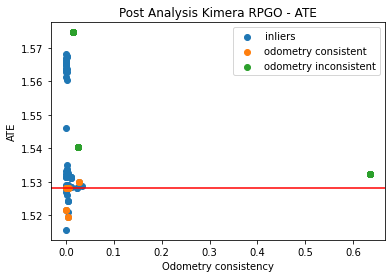

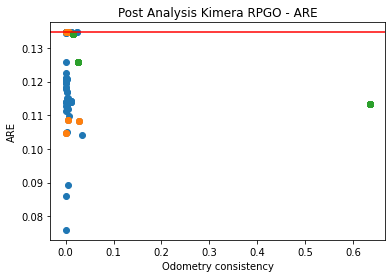

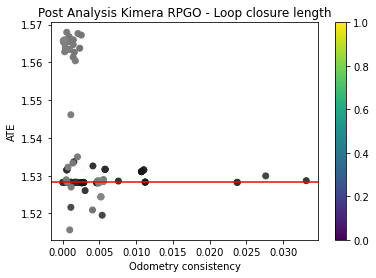

In [12]:
# Read and process data
analysis_file = open("/home/user/Desktop/june_r2_analysis/relaxed_lc/post_analysis.txt","r")
lines = analysis_file.readlines()
inliers_ate = []
inliers_are = []
inliers_consistency = []
inliers_trajlen = []
odom_consistent_ate = []
odom_consistent_are = []
odom_consistency = []
odom_consistent_trajlen = []
odom_inconsistent_ate = []
odom_inconsistent_are = []
odom_incons_consistency = []
odom_incons_trajlen = []
lines = lines[1:]
max_trajlen = 0
ate_no_lc = 0
are_no_lc = 0
for line in lines:
    stat = []
    for i in [0,1]:
        stat.append(line.split()[i])
    for i in range(2,len(line.split())):
        stat.append(float(line.split()[i]))
    
    if (stat[0] == '0' and stat[1] == '0'):
        ate_no_lc = stat[2]
        are_no_lc = stat[3]
        
    if stat[5] > max_trajlen:
        max_trajlen = stat[5]
    if stat[-1] == 0:
        inliers_ate.append(stat[2])
        inliers_are.append(stat[3])
        inliers_consistency.append(stat[4])
        inliers_trajlen.append(stat[5])
    elif stat[-1] == 1:
        odom_consistent_ate.append(stat[2])
        odom_consistent_are.append(stat[3])
        odom_consistency.append(stat[4])
        odom_consistent_trajlen.append(stat[5])
    else:
        odom_inconsistent_ate.append(stat[2])
        odom_inconsistent_are.append(stat[3])
        odom_incons_consistency.append(stat[4])
        odom_incons_trajlen.append(stat[5])
                          
fig1 = plt.figure()
ax = plt.subplot(111)
ax.scatter(inliers_consistency, inliers_ate, label="inliers")
ax.scatter(odom_consistency, odom_consistent_ate, label="odometry consistent")
ax.scatter(odom_incons_consistency, odom_inconsistent_ate, label="odometry inconsistent")
plt.xlabel('Odometry consistency')
plt.ylabel('ATE')
plt.title('Post Analysis Kimera RPGO - ATE')
ax.axhline(ate_no_lc, c='r')
ax.legend()

fig2 = plt.figure()
ax = plt.subplot(111)
ax.scatter(inliers_consistency, inliers_are, label="inliers")
ax.scatter(odom_consistency, odom_consistent_are, label="odometry consistent")
ax.scatter(odom_incons_consistency, odom_inconsistent_are, label="odometry inconsistent")
plt.xlabel('Odometry consistency')
plt.ylabel('ARE')
plt.title('Post Analysis Kimera RPGO - ARE')
ax.axhline(are_no_lc, c='r')


fig3 = plt.figure()
ax = plt.subplot(111)
color = [str(trajlen/max_trajlen) for trajlen in inliers_trajlen]
sc = ax.scatter(inliers_consistency, inliers_ate, c=color)
plt.xlabel('Odometry consistency')
plt.ylabel('ATE')
plt.title('Post Analysis Kimera RPGO - Loop closure length')
ax.axhline(ate_no_lc, c='r')
plt.colorbar(sc)

plt.show()